In [5]:
#importing prophet
from fbprophet import Prophet
import os
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [4]:
df = pd.read_csv('chris-ice_ncf1.csv')
df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2021-01-07,79.30,81.00,79.30,81.05,1.60,80.15,19.0,1872.0,NaN,NaN,31.0
1,2021-01-06,80.10,80.10,79.50,79.45,-0.90,79.85,15.0,1864.0,NaN,NaN,1.0
2,2021-01-05,81.50,81.50,80.50,80.35,-0.85,80.87,44.0,1849.0,NaN,NaN,94.0
3,2021-01-04,82.25,82.25,81.25,81.20,NaN,81.93,36.0,1778.0,NaN,NaN,94.0
4,2020-12-31,81.30,81.30,80.50,80.50,-1.10,80.81,16.0,1785.0,NaN,NaN,NaN


In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

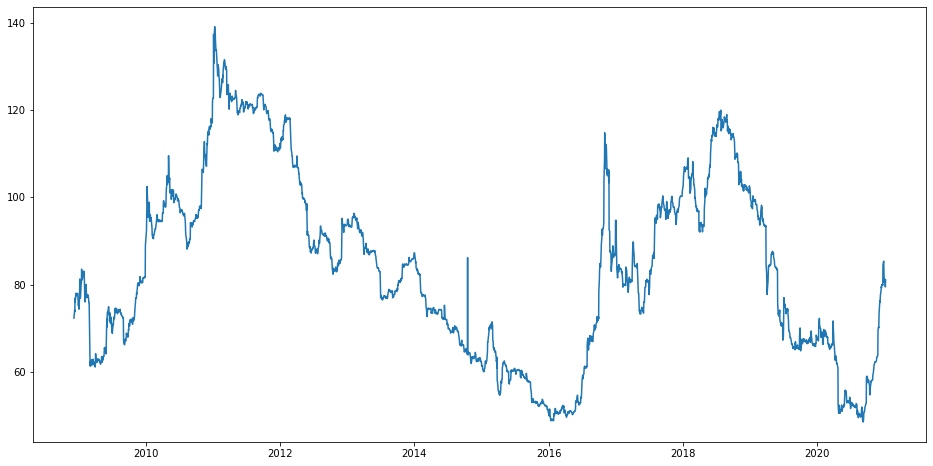

In [7]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Settle'], label='Close Price history')

In [8]:
data = df.sort_index(ascending=True, axis=0)


In [9]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Settle'])


In [10]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Settle'][i] = data['Settle'][i]

In [11]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [12]:
new_data.rename(columns={'Settle': 'y', 'Date': 'ds'}, inplace=True)


In [43]:
#train and validation
train = new_data[:2000]
valid = new_data[2000:]

In [44]:
#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train)


In [45]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-12-05,71.821648,64.363559,77.504906,71.821648,71.821648,-0.986907,-0.986907,-0.986907,-0.652041,...,-0.186234,-0.186234,-0.186234,-0.148633,-0.148633,-0.148633,0.0,0.0,0.0,70.834741
1,2008-12-08,71.768742,64.197974,77.734014,71.768742,71.768742,-0.927882,-0.927882,-0.927882,-0.652041,...,-0.400511,-0.400511,-0.400511,0.124670,0.124670,0.124670,0.0,0.0,0.0,70.840859
2,2008-12-09,71.751106,64.049652,77.576483,71.751106,71.751106,-0.812712,-0.812712,-0.812712,-0.652041,...,-0.374955,-0.374955,-0.374955,0.214283,0.214283,0.214283,0.0,0.0,0.0,70.938395
3,2008-12-10,71.733471,64.326296,77.560786,71.733471,71.733471,-0.769209,-0.769209,-0.769209,-0.652041,...,-0.420784,-0.420784,-0.420784,0.303616,0.303616,0.303616,0.0,0.0,0.0,70.964262
4,2008-12-11,71.715836,64.092615,77.720429,71.715836,71.715836,-0.629937,-0.629937,-0.629937,-0.652041,...,-0.371084,-0.371084,-0.371084,0.393188,0.393188,0.393188,0.0,0.0,0.0,71.085898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2019-10-04,59.314330,-15.849510,130.305432,-12.642010,131.908060,-2.055234,-2.055234,-2.055234,-0.652041,...,-0.186234,-0.186234,-0.186234,-1.216960,-1.216960,-1.216960,0.0,0.0,0.0,57.259096
3092,2019-10-05,59.314589,-14.211699,133.295867,-12.681718,131.936947,-0.380971,-0.380971,-0.380971,-0.652041,...,1.672063,1.672063,1.672063,-1.400994,-1.400994,-1.400994,0.0,0.0,0.0,58.933618
3093,2019-10-06,59.314847,-15.765519,129.947935,-12.714430,131.965835,-2.167275,-2.167275,-2.167275,-0.652041,...,0.081505,0.081505,0.081505,-1.596739,-1.596739,-1.596739,0.0,0.0,0.0,57.147572
3094,2019-10-07,59.315105,-16.532733,130.767429,-12.885038,131.994722,-2.853883,-2.853883,-2.853883,-0.652041,...,-0.400511,-0.400511,-0.400511,-1.801331,-1.801331,-1.801331,0.0,0.0,0.0,56.461223


In [46]:
#rmse
forecast_valid = forecast['yhat'][2000:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

31.88996944979305

<ipython-input-47-0102cca35a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-47-0102cca35a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


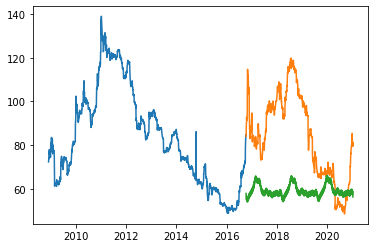

In [47]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])